## Introduction

###### Cleaning the Data

Given the large dataset, it was important to clean the data to ensure its accuracy and relevance for analysis. When the dataset was originally downloaded, all the data types were objects, therefore making the data difficult to analyse. Therefore it was important to clean the data so that the relevant data was changed to numeric and the amount of missing values was reduced

###### Analysing the Data

To gain insights into the popularity of different app categories, I focused on the game category, specifically analyzing how reviews, ratings, and genres influence the number of installs. 

By exploring trends within the game category, I aim to explore patterns related to user preferences, specifically focusing on how different metrics can relate to the success of an app. 

### Cleaning Data

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sys
import re
import numpy as np

The google playstore dataset can be downloaded as a CSV file through the link provided below. Once downloaded it can be accessed through the Downloads directory.

https://www.kaggle.com/datasets/lava18/google-play-store-apps

In [2]:
google_df= pd.read_csv('/Users/niveda/Downloads/googleplaystore.csv', sep=',', header='infer')

In [3]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Rename columns to Paid
google_df = google_df.rename(columns={'Type': 'Paid'})

In [5]:
# Check for missing values in each column 
missing_values = google_df.isnull().sum()
print(missing_values)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Paid                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [6]:
# removed rows that had missing
google_df= google_df.dropna(subset=["Paid", "Content Rating", "Current Ver", "Android Ver"])

### Convert Data Types of Columns

In [7]:
# Reviews (object to integer)
google_df["Reviews"] = pd.to_numeric(google_df["Reviews"], errors="coerce").astype("Int64")

# Ratings (object to float)
google_df["Rating"] = pd.to_numeric(google_df["Rating"], errors="coerce").astype("Float64").fillna(0)

# Installs (object to integer)
google_df['Installs'] = google_df['Installs'].astype(str).str.replace(',', '').str.replace('+', '').astype('Int64') # Remove commas and '+' signs, then convert to nullable Int64

# Type (object to boolean)
google_df['Paid'] = google_df['Paid'].map({'Free': 0, 'Paid': 1}).astype(bool) # Map 'free' to 0 and 'paid' to 1, then convert to boolean

# Paid (object to float)
google_df['Price'] = google_df['Price'].astype(str).str.replace('$', '').str.replace(',', '').astype("Float64") # Remove dollar signs and commas, then convert to Float

# Last Updated column (object to datetime)
google_df['Last Updated'] = pd.to_datetime(google_df['Last Updated'], errors='coerce')

#Split the Genres Category into Main Categories and Sub-Categories
google_df[['Main Genre', 'Sub Genre']] = google_df['Genres'].str.split(';', expand=True)


In [8]:
# Drop the Genres column
google_df = google_df.drop('Genres', axis=1)

Data in the size column does not use a standardised unit. Data in this column needs to be converted so that 

In [9]:
# Function to convert size to megabytes
def convert_to_mb(Size):
    # Remove commas and spaces
    Size = str(Size).replace(',', '').strip()

    # Check if the size contains 'M' (for megabytes)
    if 'M' in Size:
        return float(Size.replace('M', ''))  # Convert M directly to float

    # Check if the size contains 'k' (for kilobytes)
    elif 'k' in Size:
        return float(Size.replace('k', '')) / 1000  # Convert kB to MB by dividing by 1000

    # If it's a plain number (assuming it's in bytes), convert it to megabytes (divide by 1,000,000)
    elif Size.replace('.', '', 1).isdigit():
        return float(Size) / 1000000  # Convert bytes to MB by dividing by 1,000,000

    # Handle "varies with device" by replacing it with NaN
    elif "varies with device" in Size:
        return np.nan

    return np.nan  # Return NaN for unrecognized formats

# Apply the conversion function to the 'Size' column
google_df['Size'] = google_df['Size'].apply(convert_to_mb)

In [11]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Paid,Price,Content Rating,Last Updated,Current Ver,Android Ver,Main Genre,Sub Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,False,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up,Art & Design,None
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,False,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,False,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up,Art & Design,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,False,0.0,Teen,2018-06-08,Varies with device,4.2 and up,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,False,0.0,Everyone,2018-06-20,1.1,4.4 and up,Art & Design,Creativity


In [12]:
# Check for missing values in each column 
missing_values = google_df.isnull().sum()
print(missing_values)

App                   0
Category              0
Rating                0
Reviews               0
Size               1694
Installs              0
Paid                  0
Price                 0
Content Rating        0
Last Updated          0
Current Ver           0
Android Ver           0
Main Genre            0
Sub Genre         10331
dtype: int64


# Analysing Data 

####  Most Popular Categories

/var/folders/5h/s8h38bjn2q739c68r2nnl4xm0000gn/T/ipykernel_93242/3955915093.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Installs', y='Category', data=category_installs, palette='viridis')


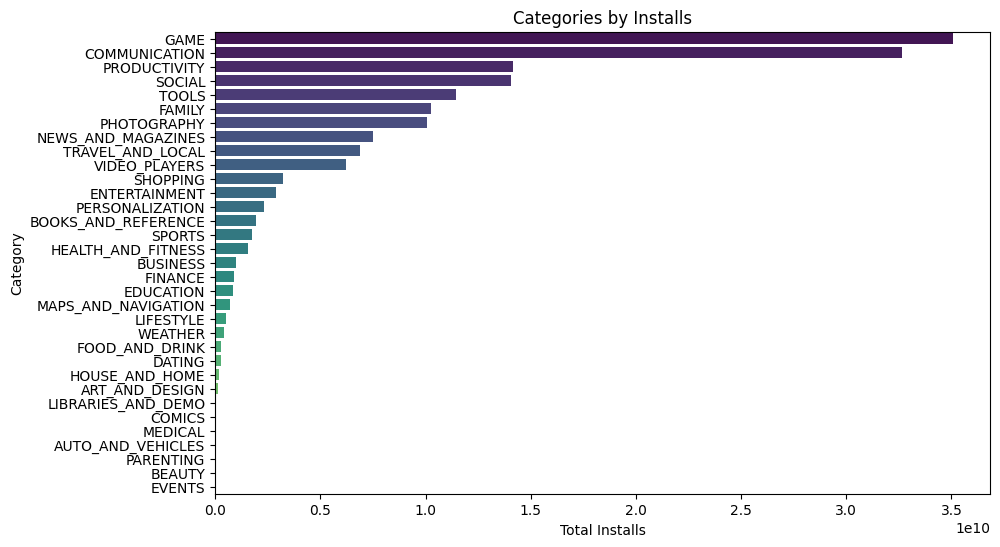

In [83]:
# Group by Category and sum the 'Installs' column
category_installs = google_df.groupby('Category')['Installs'].sum().reset_index()

# Sort the categories by the number of installs in descending order
category_installs = category_installs.sort_values(by='Installs', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Installs', y='Category', data=category_installs, palette='viridis')

# Add labels and title
plt.title(f"Categories by Installs")
plt.xlabel("Total Installs")
plt.ylabel("Category")

# Show the plot
plt.show()


I wanted to compare the popularity of the type of app categories through a bar chart. As you can see the games appear to be the most installed category of games. I thought this was worth investigating to see the trends within this category.

### Assessing Trends Within The Game Category

In [124]:
game_df = google_df[google_df['Category'] == 'GAME']

/var/folders/5h/s8h38bjn2q739c68r2nnl4xm0000gn/T/ipykernel_93242/244446530.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  Installs_plt = sns.barplot(x='Installs', y='Main Genre', data=game_installs, palette='viridis')


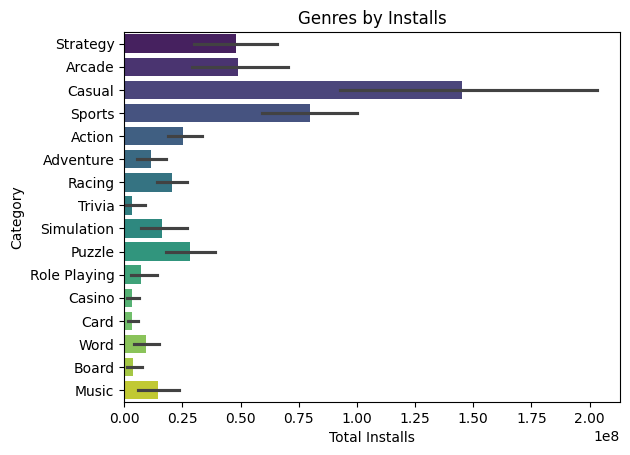

/var/folders/5h/s8h38bjn2q739c68r2nnl4xm0000gn/T/ipykernel_93242/244446530.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  Reviews_plt = sns.barplot(x='Reviews', y='Main Genre', data=game_installs, palette='viridis')


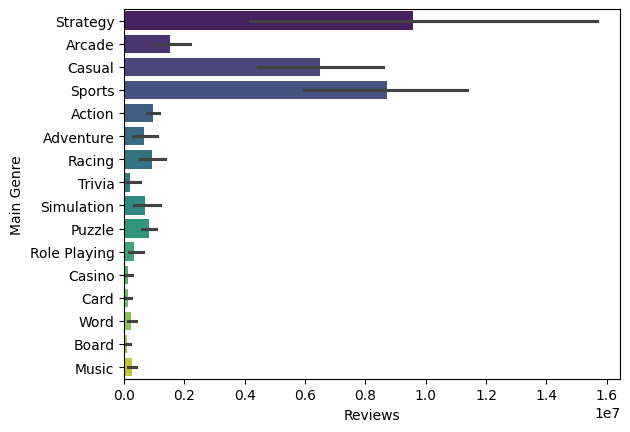

/var/folders/5h/s8h38bjn2q739c68r2nnl4xm0000gn/T/ipykernel_93242/244446530.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  Installs_plt = sns.barplot(x='Rating', y='Main Genre', data=game_installs, palette='viridis')


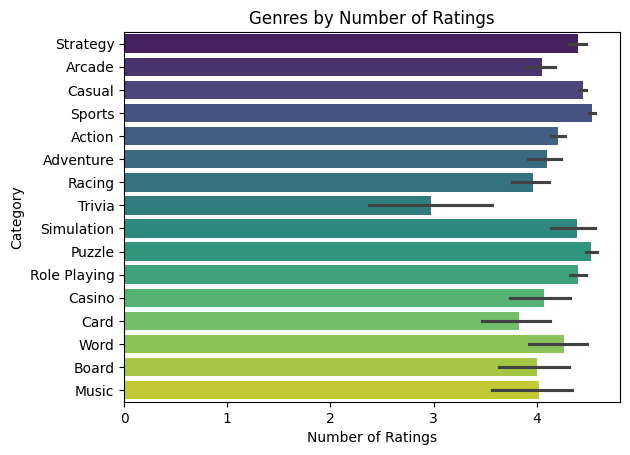

In [129]:
# Sort the categories by the number of installs in descending order
game_installs = game_df.sort_values(by='Installs', ascending=False)
game_installs = game_df.sort_values(by='Rating', ascending=False)
game_installs = game_df.sort_values(by='Reviews', ascending=False)

# Installs against Main Genre Bar Chart
Installs_plt = sns.barplot(x='Installs', y='Main Genre', data=game_installs, palette='viridis')
Installs_plt.set_title(f"Genres by Installs"), Installs_plt.set_xlabel("Total Installs"), Installs_plt.set_ylabel("Category")
plt.show()

# Reviews against Main Genre Bar Chart
Reviews_plt = sns.barplot(x='Reviews', y='Main Genre', data=game_installs, palette='viridis')
Installs_plt.set_title(f"Genres by Reviews"), Installs_plt.set_xlabel("Number of Reviews"), Installs_plt.set_ylabel("Category")
plt.show()

# Ratings against Main Genre Bar Chart
Installs_plt = sns.barplot(x='Rating', y='Main Genre', data=game_installs, palette='viridis')
Installs_plt.set_title(f"Genres by Number of Ratings"), Installs_plt.set_xlabel("Number of Ratings"), Installs_plt.set_ylabel("Category")
plt.show()


Through the data above, casual and action games are the most popular genres in terms of installs, reviews and ratings, however music, board and word games were consistently the least popular. 

There does appear to be a correlation between installs ad reviews, but it is unclear whether ratings affect the popularity of an app.

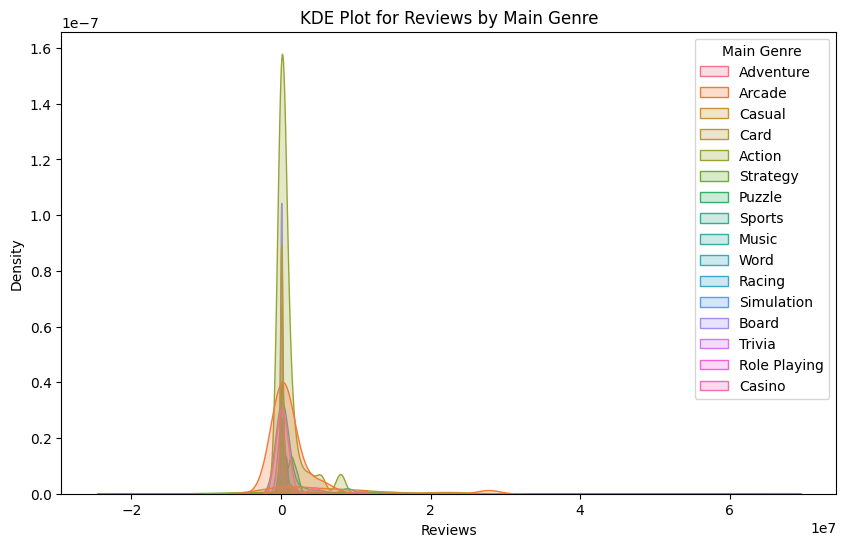

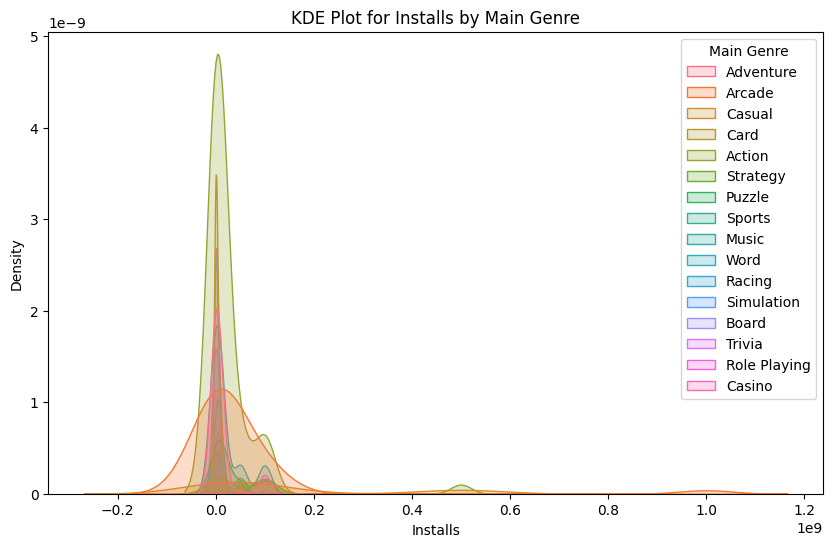

In [135]:
# KDE Plot for Rating vs Main Genre
plt.figure(figsize=(10, 6))
sns.kdeplot(data=game_df, x='Reviews', hue='Main Genre', fill=True)
plt.title('KDE Plot for Reviews by Main Genre')
plt.xlabel('Reviews')
plt.ylabel('Density')
plt.show()

# KDE Plot for Installs vs Main Genre
plt.figure(figsize=(10, 6))
sns.kdeplot(data=game_df, x='Installs', hue='Main Genre', fill=True)
plt.title('KDE Plot for Installs by Main Genre')
plt.xlabel('Installs')
plt.ylabel('Density')
plt.show()

Both reviews and installs for most genres are heavily concentrated at low values, implying that most apps are relatively new or not highly popular.

Genres like Adventure and Casino seem to have higher densities at lower reviews, which could indicate fewer but more engaged users.Genres like Puzzle and Sports have wider spreads in installs, suggesting more varied popularity and larger user bases.

Both datasets show similar patterns, with a large concentration of apps in the low-range installs and reviews, but the nature of the distribution suggests installs are typically more varied across genres than reviews are.

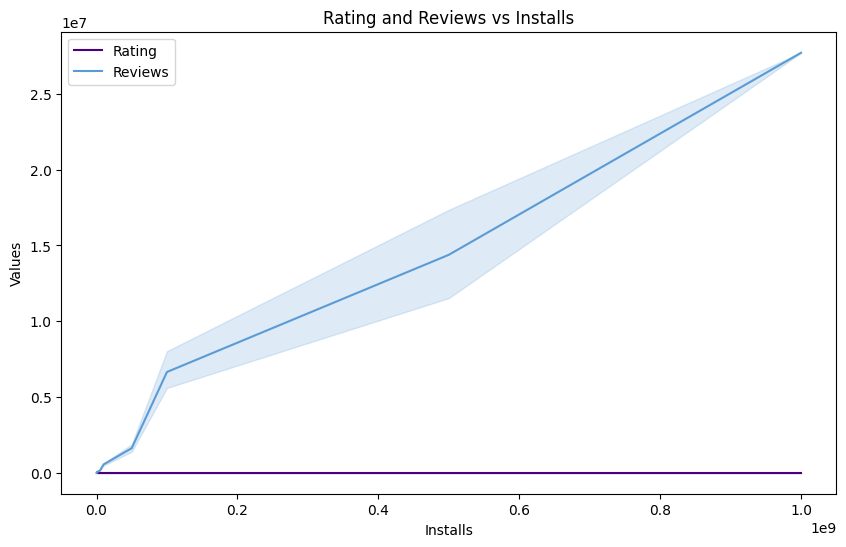

In [176]:
plt.figure(figsize=(10, 6))

# Plot Rating vs Installs
sns.lineplot(data=game_df, x='Installs', y='Rating', label='Rating', color='#4B0082')

# Plot Reviews vs Installs
sns.lineplot(data=game_df, x='Installs', y='Reviews', label='Reviews', color='#5A9BD5')

# Set the title and labels
plt.title('Rating and Reviews vs Installs')
plt.xlabel('Installs')
plt.ylabel('Values')


plt.legend()
plt.show()

There is an apparent positive correlation between the number of installs and the number of reviews, however the number installs did not appear to be affected by the rating of the app.

/Users/niveda/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'Title'
  cset = contour_func(


Text(0.5, 0.98, 'Comparing Installs and Reviews')

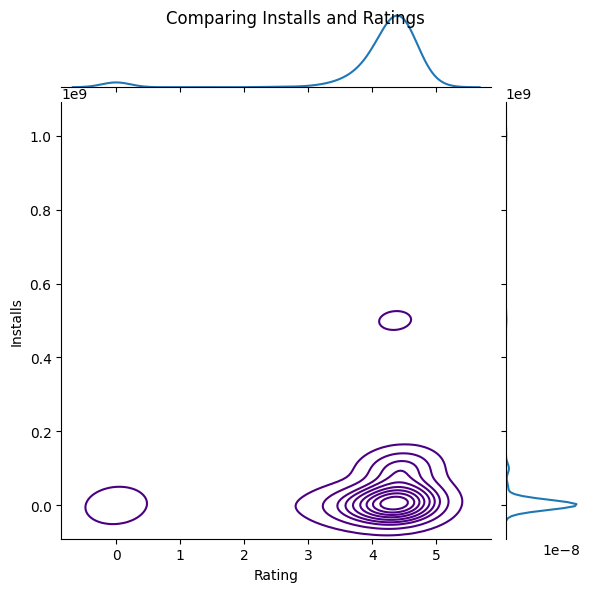

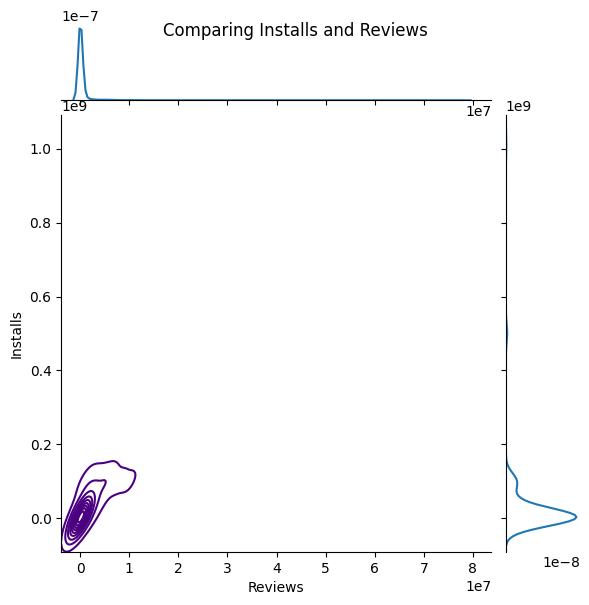

In [183]:
# Ratings and Installs
plot1 = sns.jointplot(x=game_df['Rating'], y =google_df['Installs'], colors='#4B0082', kind='kde')
plot1.fig.suptitle("Comparing Installs and Ratings")

# Reviews and Installs
plot2 = sns.jointplot(x=google_df['Reviews'], y =game_df['Installs'], Title=["Comparing Installs and Reviews"], colors='#4B0082', kind='kde')
plot2.fig.suptitle("Comparing Installs and Reviews")

Even though installs distributed is heavily skewed, it is still mostly concentrated at lower values for both ratings and reviews.

Rating seems to be positively correlated with installs but mainly for higher ratings.
Reviews don't show much variation in the data and are clearly concentrated in the lower range.

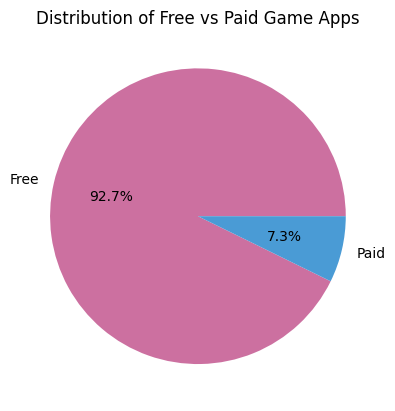

In [168]:
# Calculate the value counts of the 'Paid' column
paid_counts = game_df['Paid'].value_counts()

# Create the pie chart
plt.pie(paid_counts, labels=['Free', 'Paid'], autopct='%1.1f%%', colors=['#CC70A0','#4A9BD5'])

# Add a title
plt.title("Distribution of Free vs Paid Game Apps")

# Show the pie chart
plt.show()

92.7% of the game apps on the google play store are free, suggesting that free apps are generally more available, and could possible be more popular 

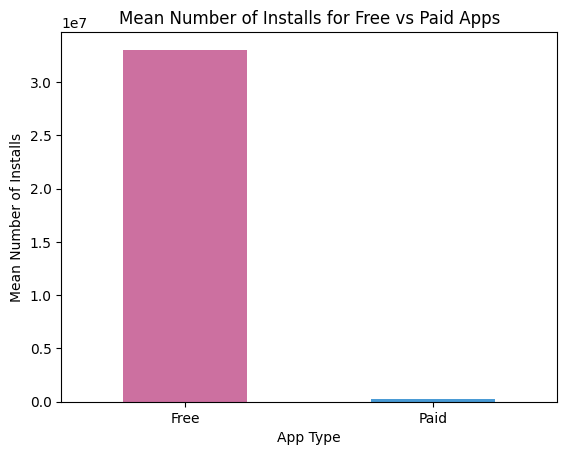

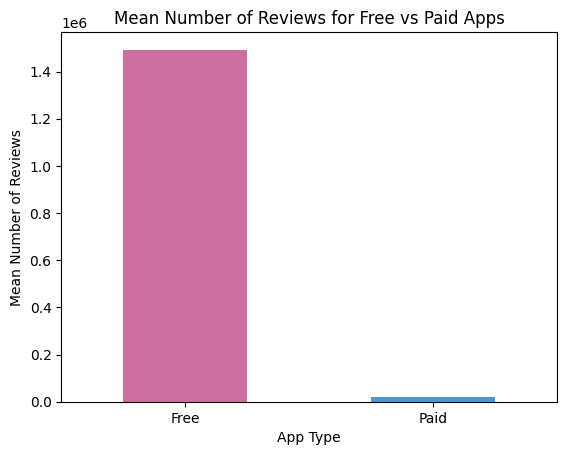

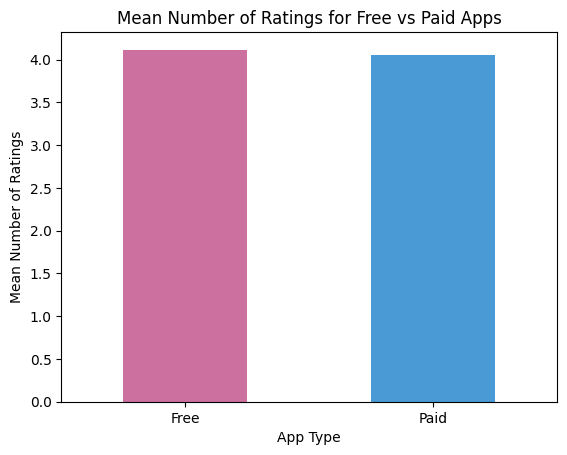

In [169]:
# Calculate the mean number of installs for paid and free apps
mean_installs = game_df.groupby('Paid')['Installs'].mean()
mean_ratings = game_df.groupby('Paid')['Rating'].mean()
mean_reviews = game_df.groupby('Paid')['Reviews'].mean()

# Create the bar chart
mean_installs.plot(kind='bar', color=['#CC70A0', '#4A9BD5'])
# Add labels and title
plt.xlabel('App Type'), plt.ylabel('Mean Number of Installs'), plt.title('Mean Number of Installs for Free vs Paid Apps')

# Show the bar chart
plt.xticks([0, 1], ['Free', 'Paid'], rotation=0)
plt.show()

# Create the bar chart
mean_reviews.plot(kind='bar', color=['#CC70A0', '#4A9BD5'])
# Add labels and title
plt.xlabel('App Type'), plt.ylabel('Mean Number of Reviews'), plt.title('Mean Number of Reviews for Free vs Paid Apps')

# Show the bar chart
plt.xticks([0, 1], ['Free', 'Paid'], rotation=0)
plt.show()

# Create the bar chart
mean_ratings.plot(kind='bar', color=['#CC70A0', '#4A9BD5'])
# Add labels and title
plt.xlabel('App Type'), plt.ylabel('Mean Number of Ratings'), plt.title('Mean Number of Ratings for Free vs Paid Apps')

# Show the bar chart
plt.xticks([0, 1], ['Free', 'Paid'], rotation=0)
plt.show()

Free apps have a significantly higher number of installs and reviews compared to paid apps, however ratings appear to be pretty consistents among both paid and free apps. 

In general, it appears that free apps have more user engagement, specifically in terms of installs and reviews.

### Histograms

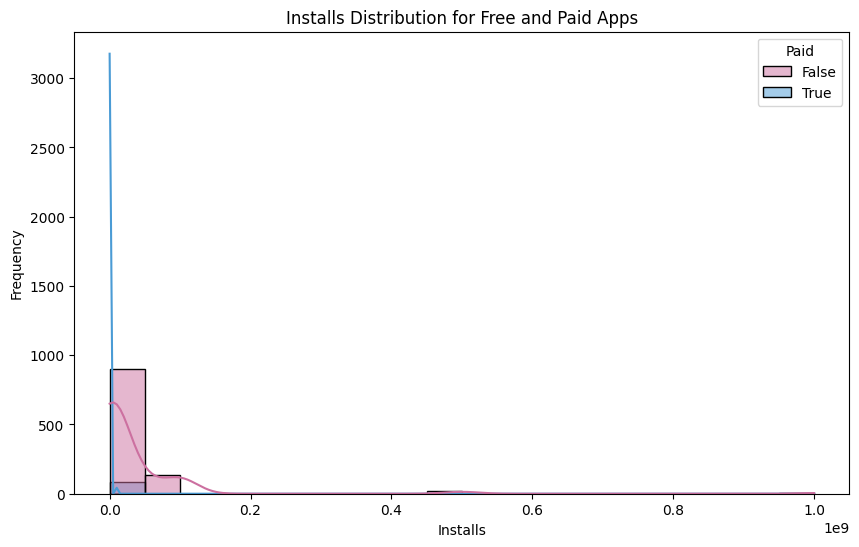

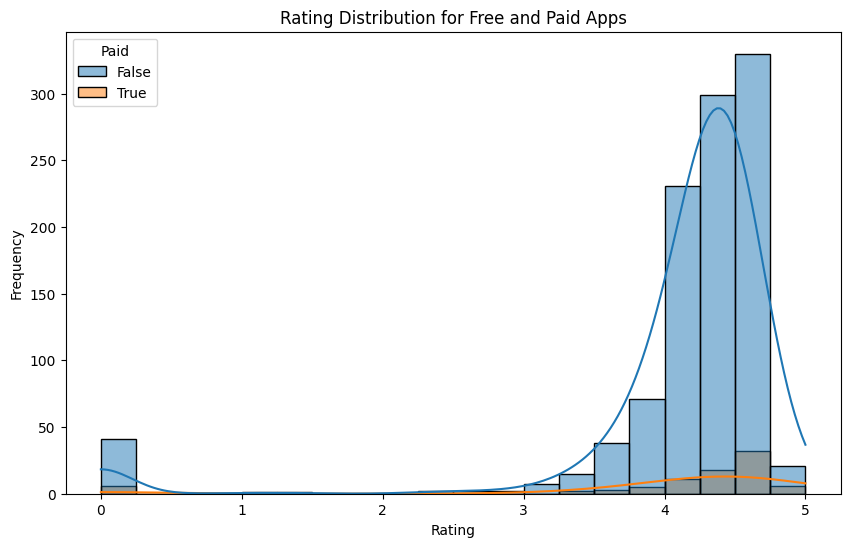

In [186]:
# Histogram for Rating based on App Type
plt.figure(figsize=(10,6))
sns.histplot(data=game_df, x='Installs', hue='Paid', kde=True, bins=20, palette=['#CC70A0', '#4A9BD5'])
plt.title('Installs Distribution for Free and Paid Apps')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.show()

# Histogram for Rating based on App Type
plt.figure(figsize=(10,6))
sns.histplot(data=game_df, x='Rating', hue='Paid', kde=True, bins=20, color=['#CC70A0', '#4A9BD5'])
plt.title('Rating Distribution for Free and Paid Apps')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Both paid and free apps show a high frequency of apps with very low installs. Although paid apps have a smaller frequency, they have a higher number of installs in the higher ranges. This suggests more intent for the users when choosing to download paid apps.s 

Free apps tend to have ratings clustered around 4 and 5, with a high frequency at those ratings. There are also some lower ratings (near 0 or 1) but in much lower frequency.Paid apps show a very low frequency across all ratings, with only a small number of paid apps receiving ratings. They tend to have lower ratings compared to free apps, especially between 0 and 2.

It appears that free apps tend to have higher install numbers and better ratings. On the other hand, paid apps show fewer installs and generally lower ratings, with a lower frequency of ratings in the higher ranges. 

# Conclusion

In conclusion, the analysis of app category trends reveals that games, particularly casual and action genres, dominate in terms of installs, reviews, and ratings. 

Free apps generally show higher user engagement with more installs and reviews, whereas paid apps perform much lower in these categories. 

There is a strong positive correlation installs and reviews. However, there appears to be a minimal correlation between installs and ratings, as ratings appear to stay relatively consistent regardless of installs. 

Paid apps tend to receive lower ratings overall and show less variation in their data. This suggests that free apps are more popular and recieve more user interaction compared to paid apps.